## Optimize a dia-PASEF method in Jupyter notebook

In [1]:
import pydiaid.cli as cli

In [2]:
method_conf = {
    "input": {
        "save_at": r"D:\test_optimization",
        "PTM": "None",
        "library_name": r"D:\pydiaid\pydiaid\static\AlphaPept_results.csv",
        "analysis_software": "AlphaPept",
    },
    "method_parameters": {
        "mz": [300,1200],
        "ion_mobility": [0.6,1.6],
        "num_dia_pasef_scans": 20,
        "im_steps": 2,
        "overlap": 0,
        "shift_of_final_method": 0,
    },
    "graphs": {
        "plot_mz": [250, 1250],
        "plot_IM": [0.6, 1.6],
        "numbins": 50,
        "window_frame_color": "black",
        "window_color": "white",
        "window_transparency": 0.5
    },
    "optimizer": {
        "optimizer": "Gauss",
        "n_calls": 5,
        "initial_points": 2,
        "YA1": [0.5, 0.9],
        "YA2": [0.6, 1.0],
        "YB1": [0.9, 1.5],
        "YB2": [1.0, 1.8],
        "evaluation_parameter": "No. of covered precursors"
    }
}

In [3]:
cli.run_all(
    method_conf
)

# The output can be found in the folder specified at "save_at".

{'precursors within m/z-range [%]': 97.59}
RUN WITH: [0.783674287692417, 1.003750504251468, 1.5292554186172336, 1.464959421182495] | RESULT: 12152.0
RUN WITH: [0.8473093365152502, 1.0782547068873716, 1.8036297345076258, 1.413348018329967] | RESULT: 11125.0
RUN WITH: [0.5705251022476764, 0.9201738058748123, 1.3470463635085652, 1.5081446848805982] | RESULT: 16710.0
RUN WITH: [0.8359503735867329, 1.3020376043879844, 1.4211265934012072, 1.3690181964125474] | RESULT: 11408.0
RUN WITH: [0.5432663623821127, 0.839261707157508, 0.9527912009157502, 1.2823205638359028] | RESULT: 14901.0
########
BEST RESULT
INPUT: [0.5705251022476764, 0.9201738058748123, 1.3470463635085652, 1.5081446848805982]
OUTPUT: 16710.0
########


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Here, we present the method evaluation steps:

In [4]:
import pandas as pd
import pydiaid.loader as loader
import pydiaid.graphs as graphs

#### Loading of the dia-PASEF method and the AlphaPept library.

In [5]:
lib_name = method_conf["input"]["library_name"]
dia_PASEF = r".\Input\dia-PASEF-methods\used_for_measurements\DIAParameters.optimal_dia-PASEF_300-1200_2steps_12scans_vs2.txt"

In [6]:
df_parameters_final = pd.read_csv(
        dia_PASEF,
        skiprows=4,
        names=["MS Type", "Cycle Id", "Start IM", "End IM", "Start Mass", "End Mass", "CE"]
        )

In [7]:
dataframe = pd.read_csv(lib_name)  # .xls, .tsv, .txt
lib = loader.__parse_alpha_pept(dataframe, 'None')

#### Generating the plots that belong only to the library.

In [8]:
x, y, z = graphs.kernel_density_calculation(
    lib,
    50,
)

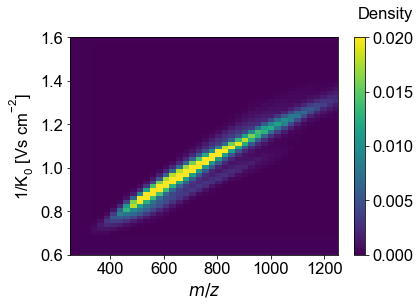

In [9]:
plt_proteomics = graphs.plot_density(
    x,
    y,
    z,
    method_conf["graphs"],
    r".\Output\tutorial\Plot_proteomics_precursors.pdf",
    gui = True
)

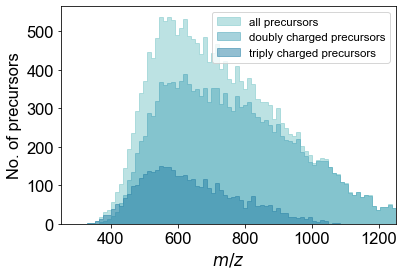

In [10]:
hist_mz = graphs.plot_precursor_distribution_as_histogram(
    lib,
    method_conf["graphs"],
    r".\Output\tutorial\histogram_proteomics_precursors_mz.pdf",
    gui = True    
)

#### Plotting the dia-PASEF method on top of the kernel density distribution.

In [11]:
import panel as pn
pn.extension()

In [12]:
save_figure_at = r".\Output\tutorial\Plot_method.png"

graphs.plot_density_and_method(
    df_parameters_final,
    x,
    y,
    z,
    method_conf["graphs"],
    save_figure_at,
)

<Figure size 432x288 with 0 Axes>

PNG(str, align='center', height=345, margin=(0, 20, 0, 0), sizing_mode='fixed', width=460)
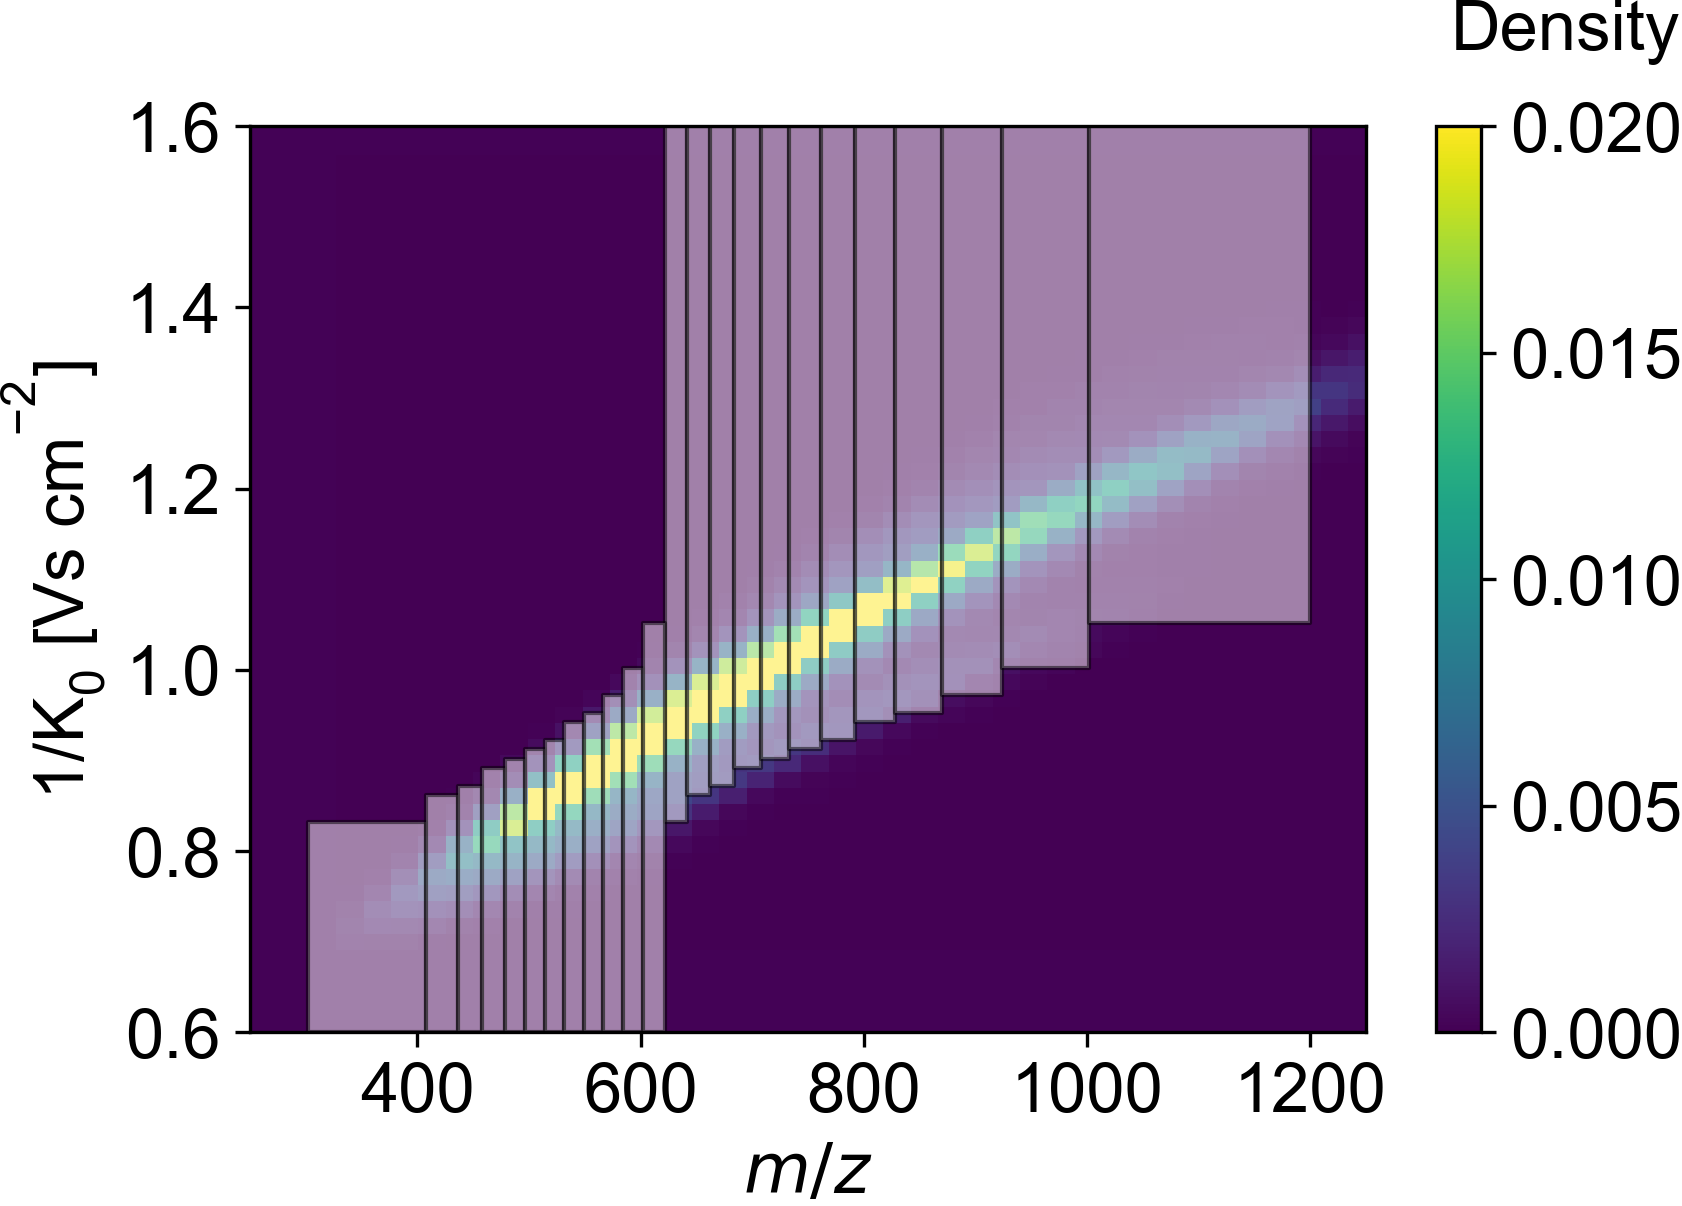

In [13]:
pn.pane.PNG(
    save_figure_at,
    height=345,
    width=460,
    align='center',
    margin=(0, 20, 0, 0)
)

#### Evaluate the die-PASEF method.

In [14]:
import pydiaid.method_evaluation as evaluator

In [15]:
dict_coverage = evaluator.coverage(
    df_parameters_final,
    lib,
)
dict_coverage

{'unique proteins in the library': 3420,
 'unique precursors in the library': 19998,
 'smallest diaPASEF window': 17.03,
 'biggest diaPASEF window': 198.07,
 'average diaPASEF window size': 37.4,
 'No. of covered proteins': 3397,
 'No. of covered precursors': 19257,
 'No. of covered, doubly charged precursors': 15056,
 'No. of covered, triply charged precursors': 3792,
 'No. of covered, quadruply charged precursors': 232,
 'all proteins covered': '99.3%',
 'all precursors covered': '96.3%',
 'all doubly charged precursors covered': '96.9%',
 'all triply charged precursors covered': '93.9%',
 'all quadruply charged precursors covered': '97.5%'}